In [1]:
using CSV
using DelimitedFiles, DataFrames
using Statistics
import PyPlot as plt
using Plots
using GLM
using ShiftedArrays
using PyCall
using PlotlyJS
using FinancialToolbox
using FinancialDerivatives
using RCall
using LsqFit

WebIO._IJuliaInit()

In [2]:
K = 100
r = .01
vol = 0.2

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price  = Array{Float64}(undef, length(S), length(T))
delta  = Array{Float64}(undef, length(S), length(T))
gamma  = Array{Float64}(undef, length(S), length(T))
theta  = Array{Float64}(undef, length(S), length(T))
vega   = Array{Float64}(undef, length(S), length(T))
rho    = Array{Float64}(undef, length(S), length(T))
lambda = Array{Float64}(undef, length(S), length(T))
psi    = Array{Float64}(undef, length(S), length(T))
vanna  = Array{Float64}(undef, length(S), length(T))
impv   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna[i,j]  = blsvanna( S[i], K, r, T[j], vol)
    impv[i,j]   = blsimpv(  S[i], K, r, T[j], price[i,j] )
end

In [13]:
my_cg = cgrad([:blue, :orange])

ColorGradient(RGBA{Float64}[RGBA{Float64}(0.0,0.0,1.0,1.0), RGBA{Float64}(1.0,0.6470588235294118,0.0,1.0)], [0.0, 1.0])

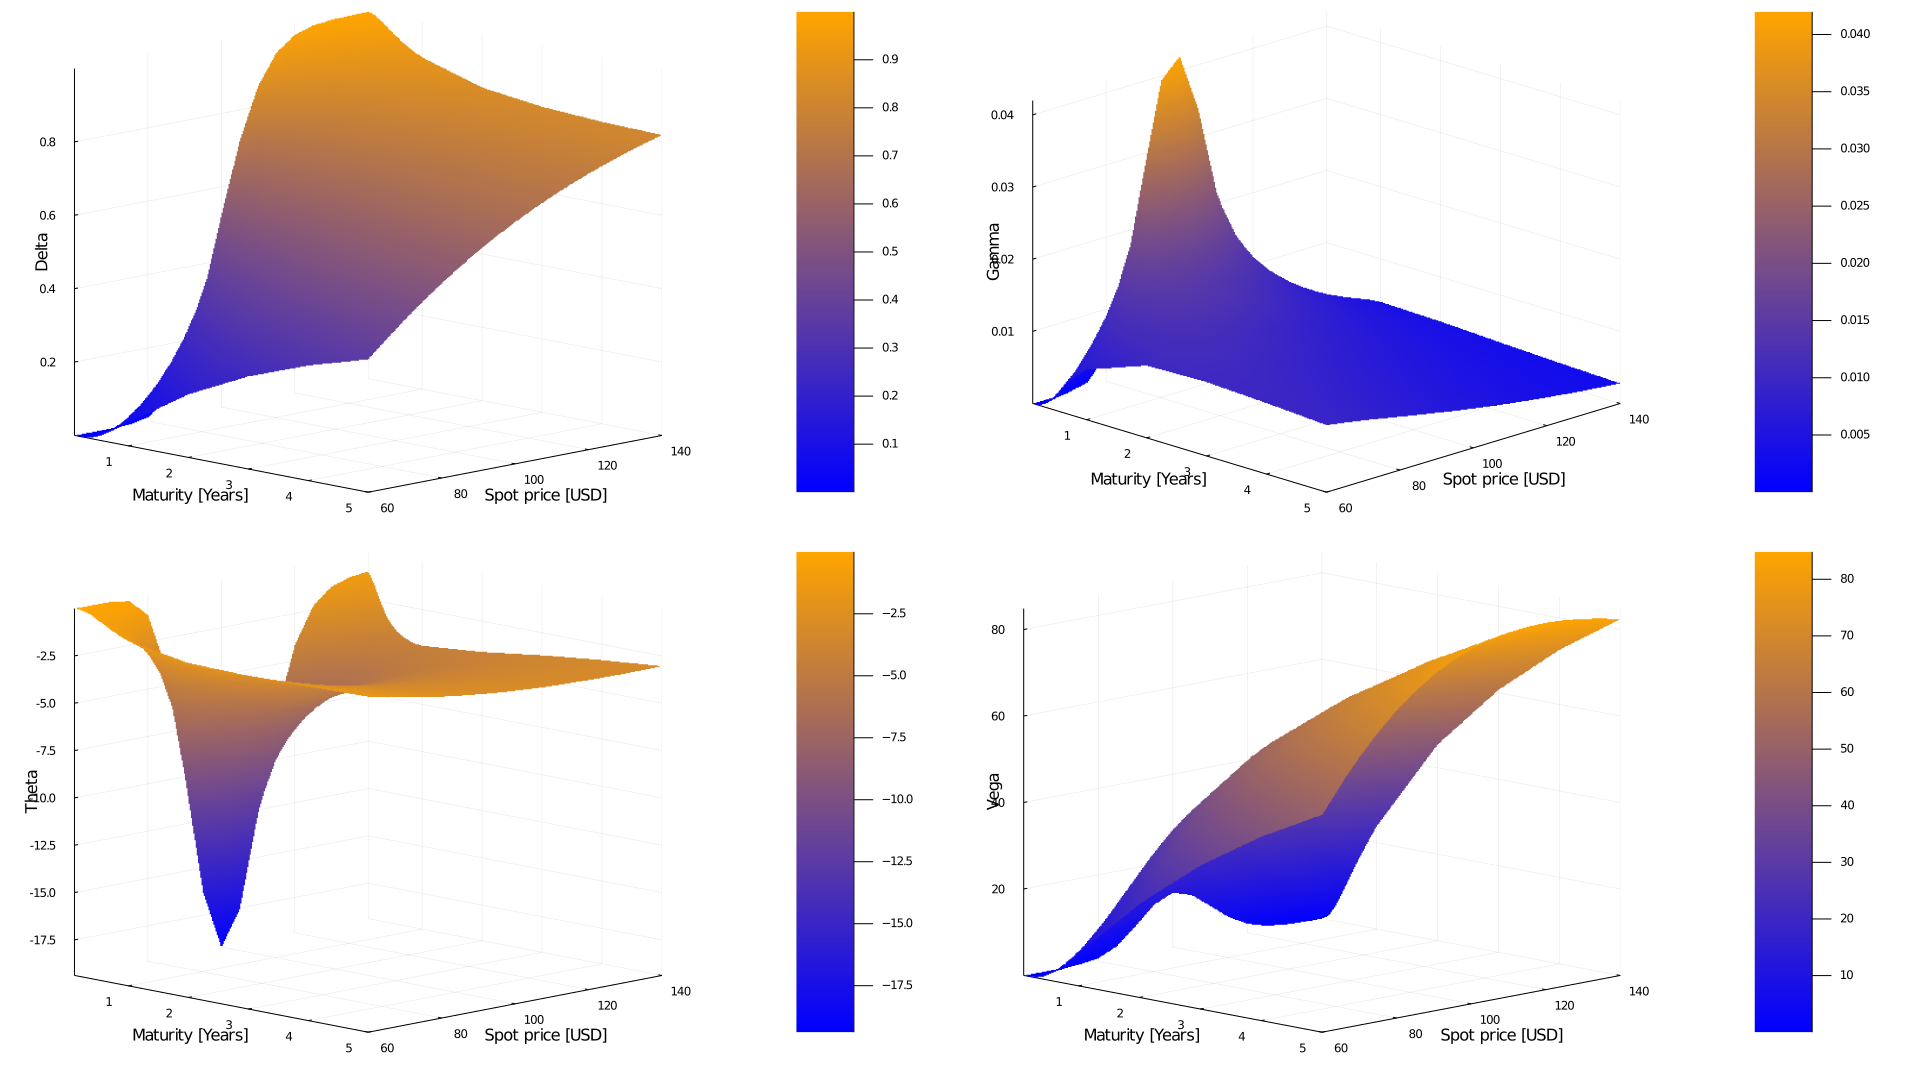

In [18]:
plot_price = Plots.plot(T, S, price,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta = Plots.plot(T, S, delta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma = Plots.plot(T, S, gamma,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta = Plots.plot(T, S, theta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega  = Plots.plot(T, S, vega, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")
plot_impv  = Plots.plot(T, S, impv, color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Implied volatility")

Plots.plot(plot_delta, plot_gamma, plot_theta, plot_vega, layout = (2, 2), size = (1920, 1080))

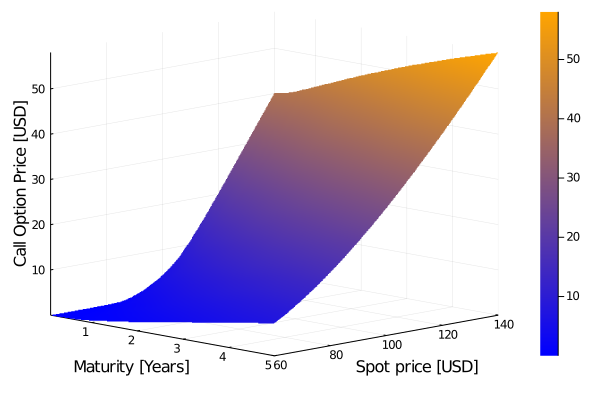

In [21]:
Plots.plot(plot_price)

In [20]:
K = 100
r = .01
vol = 0.3

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price  = Array{Float64}(undef, length(S), length(T))
delta  = Array{Float64}(undef, length(S), length(T))
gamma  = Array{Float64}(undef, length(S), length(T))
theta  = Array{Float64}(undef, length(S), length(T))
vega   = Array{Float64}(undef, length(S), length(T))
rho    = Array{Float64}(undef, length(S), length(T))
lambda = Array{Float64}(undef, length(S), length(T))
psi    = Array{Float64}(undef, length(S), length(T))
vanna  = Array{Float64}(undef, length(S), length(T))
impv   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna[i,j]  = blsvanna( S[i], K, r, T[j], vol)
    impv[i,j]   = blsimpv(  S[i], K, r, T[j], price[i,j] )
end

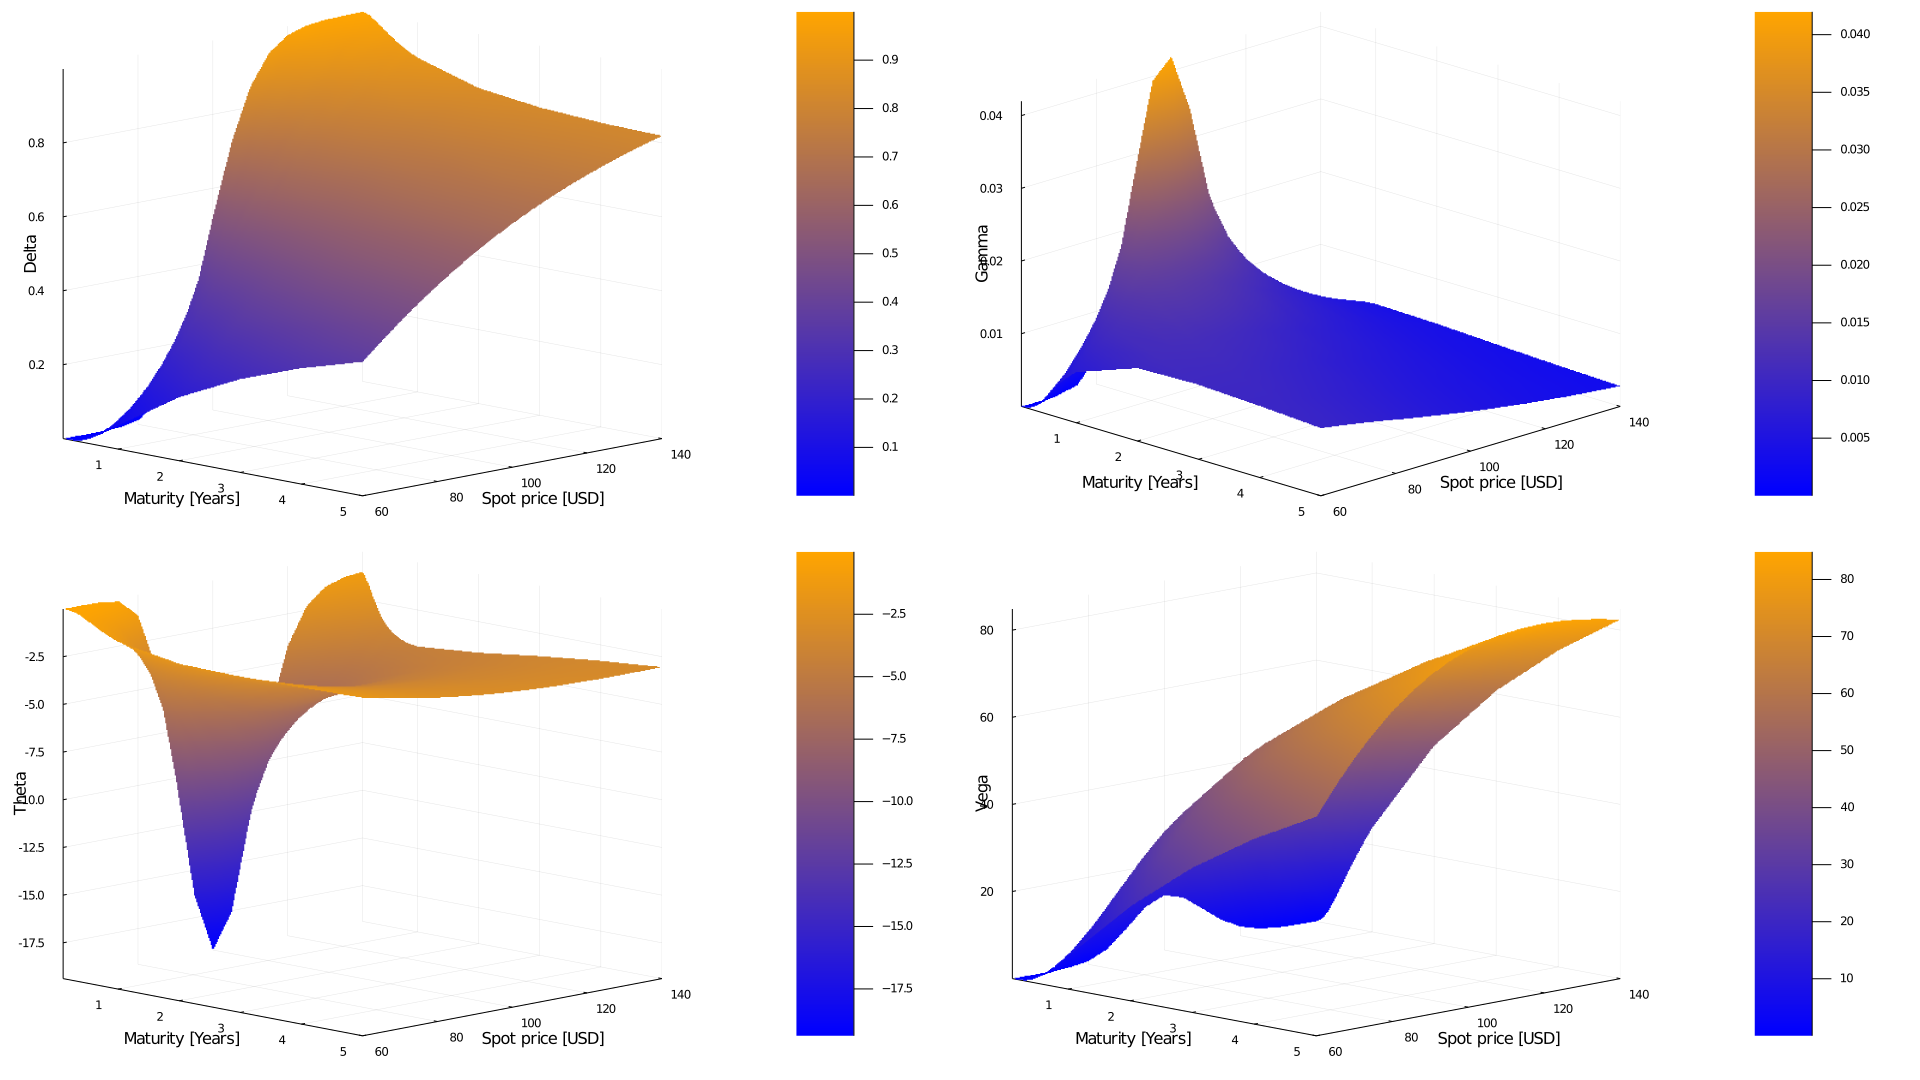

In [22]:
plot_price = Plots.plot(T, S, price,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta = Plots.plot(T, S, delta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma = Plots.plot(T, S, gamma,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta = Plots.plot(T, S, theta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega  = Plots.plot(T, S, vega, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")
plot_impv  = Plots.plot(T, S, impv, color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Implied volatility")

Plots.plot(plot_delta, plot_gamma, plot_theta, plot_vega, layout = (2, 2), size = (1920, 1080))

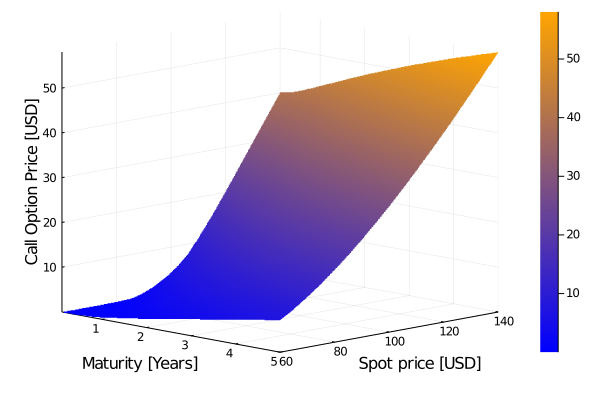

In [23]:
Plots.plot(plot_price)

In [25]:
K = 100
r = .01
vol = 0.1

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price  = Array{Float64}(undef, length(S), length(T))
delta  = Array{Float64}(undef, length(S), length(T))
gamma  = Array{Float64}(undef, length(S), length(T))
theta  = Array{Float64}(undef, length(S), length(T))
vega   = Array{Float64}(undef, length(S), length(T))
rho    = Array{Float64}(undef, length(S), length(T))
lambda = Array{Float64}(undef, length(S), length(T))
psi    = Array{Float64}(undef, length(S), length(T))
vanna  = Array{Float64}(undef, length(S), length(T))
#impv   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna[i,j]  = blsvanna( S[i], K, r, T[j], vol)
#    impv[i,j]   = blsimpv(  S[i], K, r, T[j], price[i,j] )
end

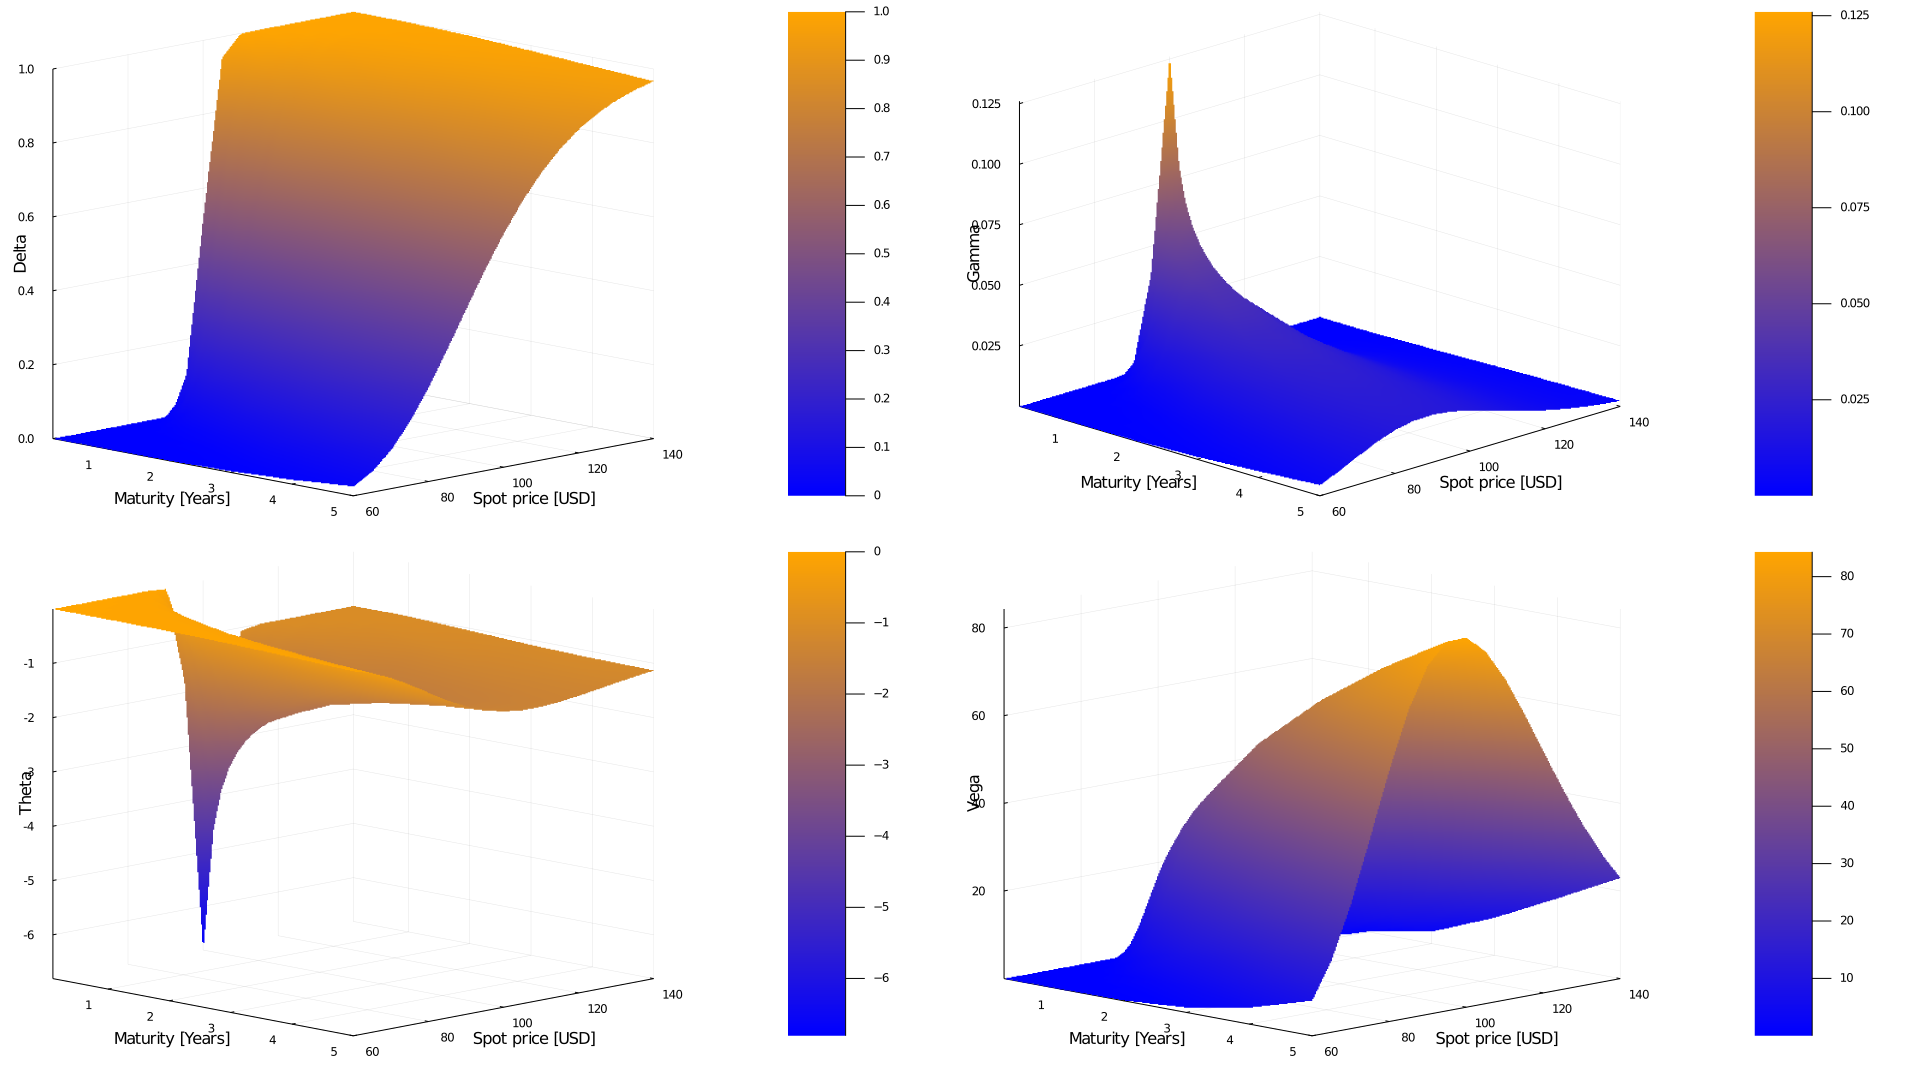

In [26]:
plot_price = Plots.plot(T, S, price,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta = Plots.plot(T, S, delta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma = Plots.plot(T, S, gamma,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta = Plots.plot(T, S, theta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega  = Plots.plot(T, S, vega, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")
plot_impv  = Plots.plot(T, S, impv, color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Implied volatility")

Plots.plot(plot_delta, plot_gamma, plot_theta, plot_vega, layout = (2, 2), size = (1920, 1080))

In [77]:
STOCK          = DataFrame(CSV.File("DATA/RUT.csv"))

S0             = STOCK.Close[length(STOCK.Close)]

CALL_OVERNIGHT = DataFrame(CSV.File("DATA/CALL_OVERNIGHT.csv"))
CALL_1MONTH    = DataFrame(CSV.File("DATA/CALL_1MONTH.csv"   ))
CALL_2MONTHS   = DataFrame(CSV.File("DATA/CALL_2MONTHS.csv"  ))
CALL_3MONTHS   = DataFrame(CSV.File("DATA/CALL_3MONTHS.csv"  ))
CALL_4MONTHS   = DataFrame(CSV.File("DATA/CALL_4MONTHS.csv"  ))
CALL_5MONTHS   = DataFrame(CSV.File("DATA/CALL_5MONTHS.csv"  ))
CALL_6MONTHS   = DataFrame(CSV.File("DATA/CALL_6MONTHS.csv"  ))
CALL_9MONTHS   = DataFrame(CSV.File("DATA/CALL_10MONTHS.csv" ))

PUT_OVERNIGHT  = DataFrame(CSV.File("DATA/PUT_OVERNIGHT.csv" ))
PUT_1MONTH     = DataFrame(CSV.File("DATA/PUT_1MONTH.csv"    ))
PUT_2MONTHS    = DataFrame(CSV.File("DATA/PUT_2MONTHS.csv"   ))
PUT_3MONTHS    = DataFrame(CSV.File("DATA/PUT_3MONTHS.csv"   ))
PUT_4MONTHS    = DataFrame(CSV.File("DATA/PUT_4MONTHS.csv"   ))
PUT_5MONTHS    = DataFrame(CSV.File("DATA/PUT_5MONTHS.csv"   ))
PUT_6MONTHS    = DataFrame(CSV.File("DATA/PUT_6MONTHS.csv"   ))
PUT_9MONTHS    = DataFrame(CSV.File("DATA/PUT_10MONTHS.csv"  ))

CALLS          = 

INTEREST_RATES = [0.32814, 0.45514, 0.96686, 1.47200, 2.12586]

T              = [   1/252,     1/12,   2/12,     3/12,     4/12,     5/12,     6/12,    10/12]
r              = [.0032814, .0045514, .00711, .0096686, .0113524, .0130362, .0147200, .0179893]

8-element Vector{Float64}:
 0.0032814
 0.0045514
 0.00711
 0.0096686
 0.0113524
 0.0130362
 0.01472
 0.0179893

[2.9082505394815152, 1.1163840645163732]

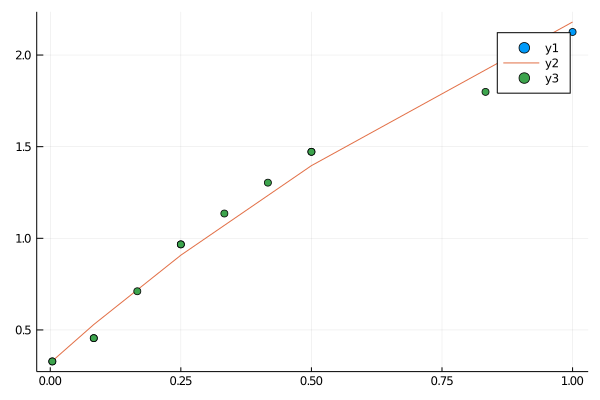

In [54]:
model(t, p) = p[1] .* log.( t .+ p[2] )
tdata = [1/252, 1/12, 3/12, 6/12, 1]
ydata = INTEREST_RATES
p0 = [0.5, 0.5]

fit = curve_fit(model, tdata, ydata, p0)
param = fit.param
print(param)

Plots.plot(tdata, ydata, seriestype = :scatter)
Plots.plot!(tdata, model(tdata, param))
Plots.plot!(T, r*100, seriestype = :scatter)

In [65]:
function Mid_Price( df )
    df[!,:Mid_Price] = ( df.Ask + df.Bid ) ./ 2
end

Mid_Price(CALL_OVERNIGHT)

110-element Vector{Float64}:
 688.5
 655.4
 612.55
 521.2
 472.20000000000005
 490.0
 572.7
 391.0
 479.75
 290.0
 279.8
 270.0
 261.1
   ⋮
   0.1
   0.075
   0.25
   0.42500000000000004
   0.025
   0.05
   0.525
   0.625
   1.05
   5.0
   0.22499999999999998
   0.19999999999999998

In [66]:
impv_OVERNIGHT = [blsimpv(S0, CALL_OVERNIGHT.Strike[i], r[1], T[1], CALL_OVERNIGHT.Mid_Price[i]) for i in 1:length(CALL_OVERNIGHT.Strike)]


LoadError: MethodError: no method matching blsimpv(::Float64, ::String, ::Float64, ::Float64, ::Float64)
[0mClosest candidates are:
[0m  blsimpv(::num1, [91m::num2[39m, ::num3, ::num4, ::num5) where {num1<:Real, num2<:Real, num3<:Real, num4<:Real, num5<:Real} at ~/.julia/packages/FinancialToolbox/os9Q4/src/financial.jl:411
[0m  blsimpv(::num1, [91m::num2[39m, ::num3, ::num4, ::num5, [91m::num6[39m) where {num1<:Real, num2<:Real, num3<:Real, num4<:Real, num5<:Real, num6<:Real} at ~/.julia/packages/FinancialToolbox/os9Q4/src/financial.jl:411
[0m  blsimpv(::num1, [91m::num2[39m, ::num3, ::num4, ::num5, [91m::num6[39m, [91m::Bool[39m) where {num1<:Real, num2<:Real, num3<:Real, num4<:Real, num5<:Real, num6<:Real} at ~/.julia/packages/FinancialToolbox/os9Q4/src/financial.jl:411
[0m  ...

In [79]:
for i in 1:length(CALL_OVERNIGHT.Strike)
    #if CALL_OVERNIGHT.Strike[i] == "-"
        println(CALL_OVERNIGHT.Strike[i])
    #end
    #Float64(CALL_OVERNIGHT.Strike[i])
end

parse.(Float16, CALL_OVERNIGHT.Strike)


1,350.00
1,400.00
1,450.00
1,500.00
1,550.00
1,600.00
1,650.00
1,700.00
1,750.00
1,800.00
1,810.00
1,820.00
1,830.00
1,840.00
1,850.00
1,860.00
1,870.00
1,880.00
1,890.00
1,900.00
1,910.00
1,920.00
1,930.00
1,940.00
1,950.00
1,960.00
1,970.00
1,980.00
1,990.00
2,000.00
2,010.00
2,020.00
2,030.00
2,040.00
2,050.00
2,060.00
2,070.00
2,080.00
2,090.00
2,100.00
2,110.00
2,120.00
2,130.00
2,140.00
2,150.00
2,160.00
2,170.00
2,180.00
2,190.00
2,200.00
2,210.00
2,220.00
2,230.00
2,240.00
2,250.00
2,260.00
2,270.00
2,280.00
2,290.00
2,300.00
2,310.00
2,320.00
2,330.00
2,340.00
2,350.00
2,360.00
2,370.00
2,380.00
2,390.00
2,400.00
2,410.00
2,420.00
2,430.00
2,440.00
2,450.00
2,460.00
2,470.00
2,480.00
2,490.00
2,500.00
2,510.00
2,520.00
2,530.00
2,540.00
2,550.00
2,560.00
2,570.00
2,580.00
2,590.00
2,600.00
2,610.00
2,620.00
2,640.00
2,660.00
2,670.00
2,700.00
2,710.00
2,720.00
2,750.00
2,800.00
2,900.00
2,950.00
3,000.00
3,050.00
3,100.00
3,150.00
3,200.00
3,250.00
3,350.00
3,400.00


LoadError: ArgumentError: cannot parse "1,350.00" as Float16

In [ ]:
layout = PlotlyJS.Layout(
    title="Call option price surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Call option price [USD]",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=price,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Delta surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Delta",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=delta,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Gamma surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Gamma",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=gamma,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Theta surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Theta",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=theta,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Vega surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Vega",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=vega,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Rho surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Rho",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=rho,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [7]:
K = 100
r = .01
vol = 0.3

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price  = Array{Float64}(undef, length(S), length(T))
delta  = Array{Float64}(undef, length(S), length(T))
gamma  = Array{Float64}(undef, length(S), length(T))
theta  = Array{Float64}(undef, length(S), length(T))
vega   = Array{Float64}(undef, length(S), length(T))
rho    = Array{Float64}(undef, length(S), length(T))
lambda = Array{Float64}(undef, length(S), length(T))
psi    = Array{Float64}(undef, length(S), length(T))
vanna  = Array{Float64}(undef, length(S), length(T))
impv   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna[i,j]  = blsvanna( S[i], K, r, T[j], vol)
    impv[i,j]   = blsimpv(  S[i], K, r, T[j], price[i,j] )
end

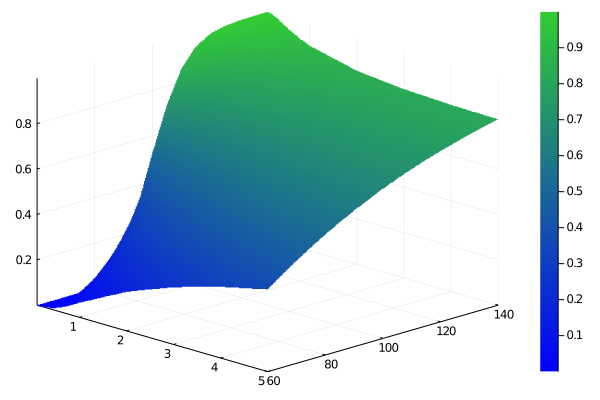

In [8]:
Plots.plot(T, S, delta,color=my_cg,st=:surface,camera=(45,45))

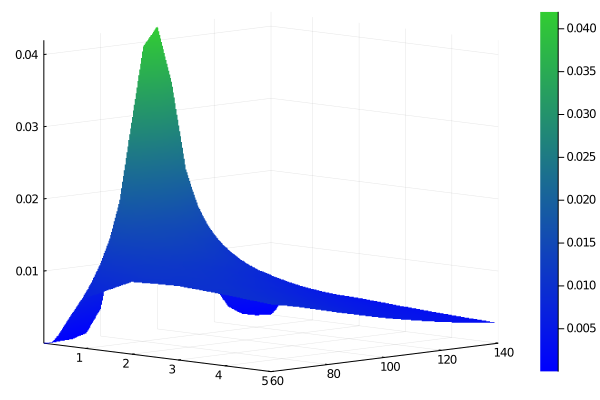

In [9]:

Plots.plot(T, S, gamma,color=my_cg,st=:surface,camera=(45,20))